# [Open Food Facts] (https://static.openfoodfacts.org/images/misc/openfoodfacts-logo-en-356x300.png)

## Introduction
## Data Preprocessing
## Exploratory Data Analysis
## In-Depth Data Analysis
## Prediction with Machine Learning
## Summary

## Introduction

As someone who's been able to reduce body fat % to under a single digit -- 8.9 -- I have always had a passion for maintaining good health, with consumption of healthy foods being one of the key factors. I used the food loggin app, MyFitnessPal, to keep track of my food consumption and realized the power of food database that provides convenience in generating insights about a person's health and body composition. Thus, when I found [this dataset on Kaggle] (https://www.kaggle.com/openfoodfacts/world-food-facts), I immediately jumped into it!

First off, let's take a look at the data at hand. Following the link to Open Food Facts website, I found [field listing with details] (https://world.openfoodfacts.org/data/data-fields.txt) available. Besides nutrition information, you'll the dataset contains interesting information such as packaging, manufacturing, orgin, or even carbon footprint.

In terms of plotting, besides *matplotlib* I plan to use and try out different Python libraries, including *plotly*, *bokeh*, and *ggplot*.
    
Now, let's load up the necessary libraries and data itself.

In [1]:
#####################################################################
# imports
#####################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly as ply
import sklearn as skl
import bokeh as bk
from ggplot import *
import datetime as dt
import os
import re


#####################################################################
# loading data
#####################################################################
food = pd.read_csv('en.openfoodfacts.org.products.tsv',
                   sep='\t',
#                    nrows=1000,
                   low_memory=False)
print("Data loaded!")

/Users/anirutw/miniconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/anirutw/miniconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/anirutw/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Data loaded!


In [2]:
print("Number of rows: " + "{:,}".format(food.shape[0]))
print("Number of columns: " + "{:,}".format(food.shape[1]))
print("(Numeric) Fields' Stats:")
food.describe()

Number of rows: 356,027
Number of columns: 163
(Numeric) Fields' Stats:


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,382.000000,49.400000,1.000000e-01,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1092.000000,300.000000,5.290000e+00,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1674.000000,900.000000,2.000000e+01,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [3]:
print("Complete Field Listing:" + "\n\t" + "\n\t".join(food.columns.tolist()))

Complete Field Listing:
	code
	url
	creator
	created_t
	created_datetime
	last_modified_t
	last_modified_datetime
	product_name
	generic_name
	quantity
	packaging
	packaging_tags
	brands
	brands_tags
	categories
	categories_tags
	categories_en
	origins
	origins_tags
	manufacturing_places
	manufacturing_places_tags
	labels
	labels_tags
	labels_en
	emb_codes
	emb_codes_tags
	first_packaging_code_geo
	cities
	cities_tags
	purchase_places
	stores
	countries
	countries_tags
	countries_en
	ingredients_text
	allergens
	allergens_en
	traces
	traces_tags
	traces_en
	serving_size
	no_nutriments
	additives_n
	additives
	additives_tags
	additives_en
	ingredients_from_palm_oil_n
	ingredients_from_palm_oil
	ingredients_from_palm_oil_tags
	ingredients_that_may_be_from_palm_oil_n
	ingredients_that_may_be_from_palm_oil
	ingredients_that_may_be_from_palm_oil_tags
	nutrition_grade_uk
	nutrition_grade_fr
	pnns_groups_1
	pnns_groups_2
	states
	states_tags
	states_en
	main_category
	main_category_en
	image_

Let's briefly view our key fields. Note that field **allergens_en**, which is supposed to be list of allergens spelled in English turns out to be just 20 unique web links, so we'll use field **allergens**, instead.

In [4]:
print("Number of (unique) brands:\t" + "{:,}".format(food['brands_tags'].dropna().unique().shape[0]))
print("Number of (unique) categories:\t" + "{:,}".format(food['categories_en'].dropna().unique().shape[0]))
print("Number of (unique) origins:\t" + "{:,}".format(food['origins_tags'].dropna().unique().shape[0]))
print("Number of (unique) countries:\t" + "{:,}".format(food['countries_en'].dropna().unique().shape[0]))
print("Number of (unique) allergens:\t" + "{:,}".format(food['allergens'].dropna().unique().shape[0]))
print("Number of (unique) categories:\t" + "{:,}".format(food['main_category_en'].dropna().unique().shape[0]))

Number of (unique) brands:	56,804
Number of (unique) categories:	24,112
Number of (unique) origins:	4,732
Number of (unique) countries:	779
Number of (unique) allergens:	16,575
Number of (unique) categories:	3,639


## Data Preprocessing

For fields, whose counterpart with suffix '-tags' exists, I'll use the counterpart because it's normalized and clean. 
    
#### Dealing with Nulls

A lot of columns' values are nulls. Depending on the fields used in the analysis, I will create different subsets of the original data set by which I drop records whose fields I'm interested in doing that analysis contain nulls.

#### Removing duplicates

Seeing the number of countries being as high as 779, one can probably tell there are duplicates in this field. After a quick investigation, we can see that the duplicates are due to the different combinations of countries, each of the combination uses a comma to separate countries. To get the list of truly unique countries, we can extract countries out of each combination into a list, prior to using Python's set to quickly consolidate and reduce those lists of countries into one final list.

In [5]:
country_set = set()
for cntry in food['countries_en'].dropna().tolist():
    country_set = country_set.union(cntry.split(","))
print("Number of (unique) countries: " + "{:,}".format(len(country_set)))
print("\t" + "\n\t".join(sorted(country_set)))

Number of (unique) countries: 224
	Afghanistan
	Albania
	Algeria
	Allemagne
	Andorra
	Angleterre
	Angola
	Ap
	Argentina
	Armenia
	Aruba
	Australia
	Austria
	Azerbaijan
	Bahrain
	Bangladesh
	Barbados
	Belarus
	Belgie
	Belgium
	Bolivia
	Bosnia and Herzegovina
	Brazil
	Brunei
	Bulgaria
	Burkina Faso
	Burundi
	Cambodia
	Cameroon
	Canada
	Central African Republic
	Chad
	Chile
	China
	Colombia
	Cook Islands
	Costa Rica
	Croatia
	Cuba
	Cyprus
	Czech Republic
	Côte d'Ivoire
	Democratic Republic of the Congo
	Denmark
	Dominican Republic
	Ecuador
	Egypt
	El Salvador
	Estonia
	Ethiopia
	European Union
	Fiji
	Finland
	France
	French Guiana
	French Polynesia
	Gabon
	Georgia
	Germany
	Ghana
	Global-market
	Greece
	Guadeloupe
	Guatemala
	Guinea
	Guinea-Bissau
	Guyana
	Haiti
	Honduras
	Hong Kong
	Hungary
	Iceland
	India
	Indonesia
	Iran
	Iraq
	Ireland
	Isle of Man
	Israel
	Italy
	Japan
	Jersey
	Jordan
	Kazakhstan
	Kenya
	Kuwait
	Latvia
	Lebanon
	Libya
	Lithuania
	Luxembourg
	Macau
	Madagascar
	Malawi


Hmm, looking at the list above, I still see entries towards the end of the list that I don't like to be included in the list. **_en:dairies_** is definitely not a country name. **en:Nederland** should also be removed as we already have **Nederland**. Lastly, there are also countries whose name is not spelled in English. All of these issues are commonplace when dealing with real-world data. And it's up to us data scientists to come up with (creative) ways to deal with them. In this case, I'll simply drop all of them, by removing those whose first character is not of uppercase.

In [6]:
regex = re.compile('^[A-Z]')
cntry_to_remove = [cntry for cntry in country_set if not regex.match(cntry)]
print("Number of countries to remove: " + "{:,}".format(len(cntry_to_remove)))
print("\t" + "\n\t".join(sorted(cntry_to_remove)))

for cntry in cntry_to_remove:
    country_set.remove(cntry)
print("Number of (unique) countries: " + "{:,}".format(len(country_set)))
print("\t" + "\n\t".join(sorted(country_set)))

Number of countries to remove: 40
	en:dairies
	en:fresh-foods
	fr:Alemania
	fr:Angleterre
	fr:Belgiqu
	fr:Bourgogne-aube-nogent-sur-seine
	fr:Demonte-italie
	fr:Deutschland
	fr:Ecosse
	fr:Frankreich
	fr:Frankrijk
	fr:Grande-bretagne
	fr:Griekenland
	fr:Irland
	fr:Marseille-5
	fr:Mauricio
	fr:Nederland
	fr:Puyricard
	fr:Quebec
	fr:Reino-unido
	fr:Schweiz
	fr:Scotland
	fr:Spanien
	fr:Spanje
	fr:Франция
	nl:Belgien
	nl:Deutschland
	nl:Frankreich
	nl:Schweiz
	xx:Danemark
	البحرين
	السعودية
	العراق
	المملكة-المتحدة
	سلطنة-عمان
	भारत
	ព្រះរាជាណាចក្រកម្ពុជា
	中华人民共和国
	日本
	香港
Number of (unique) countries: 184
	Afghanistan
	Albania
	Algeria
	Allemagne
	Andorra
	Angleterre
	Angola
	Ap
	Argentina
	Armenia
	Aruba
	Australia
	Austria
	Azerbaijan
	Bahrain
	Bangladesh
	Barbados
	Belarus
	Belgie
	Belgium
	Bolivia
	Bosnia and Herzegovina
	Brazil
	Brunei
	Bulgaria
	Burkina Faso
	Burundi
	Cambodia
	Cameroon
	Canada
	Central African Republic
	Chad
	Chile
	China
	Colombia
	Cook Islands
	Costa Rica
	Croatia


#### Splitting string into a list of elements
    
Like field **countries_en**, there are a few other interesting fields that we can preprocess, in order to create a list for further easy analysis.

* **allergens** contains a string value like
> Wheat Flour, Milk, Walnuts, Almonds, Nut, Wheat Flour, Barley


* **ingredients_text** contains a string value like
> 'Peanut butter (dry roasted peanuts, palm oil, salt), honey, crispy brown rice (brown rice flour [rice flour, rice bran], honey, calcium carbonate), barley malt, soy lecithin (an emulsifier), sea salt, locust bean gum, carrageenan gum.'


* **additives** contains a string value like
> [ peanut-butter -> en:peanut-butter  ]  [ butter -> en:butter  ]  [ dry-roasted-peanuts -> en:dry-roasted-peanuts  ]  [ roasted-peanuts -> en:roasted-peanuts  ]  [ peanuts -> en:peanuts  ]  [ palm-oil -> en:palm-oil  ]  [ oil -> en:oil  ]  [ salt -> en:salt  ]  [ honey -> en:honey  ]  [ crispy-brown-rice -> en:crispy-brown-rice  ]  [ brown-rice -> en:brown-rice  ]  [ rice -> en:rice  ]  [ brown-rice-flour -> en:brown-rice-flour  ]  [ rice-flour -> en:rice-flour  ]  [ flour -> en:flour  ]  [ rice-flour -> en:rice-flour  ]  [ flour -> en:flour  ]  [ rice-bran -> en:rice-bran  ]  [ bran -> en:bran  ]  [ honey -> en:honey  ]  [ calcium-carbonate -> en:e170  -> exists  -- ok  ]  [ barley-malt -> en:barley-malt  ]  [ malt -> en:malt  ]  [ soy-lecithin -> en:soy-lecithin  ]  [ lecithin -> en:e322i  -> exists  -- ok  ]  [ an-emulsifier -> en:an-emulsifier  ]  [ emulsifier -> en:emulsifier  ]  [ sea-salt -> en:sea-salt  ]  [ salt -> en:salt  ]  [ locust-bean-gum -> en:e410  -> exists  -- ok  ]  [ carrageenan-gum -> en:carrageenan-gum  ]  [ gum -> en:gum  ]


* **additives_en** contains a string value like
> 'E170 - Calcium carbonate,E322 - Lecithins,E322i - Lecithin,E410 - Locust bean gum'

Let's do the same preprocessing on these fields. But why don't we create a function for this purpose and call it on these fields?

In [7]:
def remove_duplicates(food_field):
    field_set = set()
    for elem in food_field.dropna().tolist():
        field_set = field_set.union(elem.split(","))
    return field_set

In [8]:
# field allergens
allergen_set = remove_duplicates(food['allergens'])
print("Number of (unique) allergens: " + "{:,}".format(len(allergen_set)))
print("\t" + "\n\t".join(sorted(allergen_set)))

Number of (unique) allergens: 3,870
	 
	  Avoine
	  Grana Padano AOP
	  Pecan Nut
	  anhydride sulfureux
	  beurre
	  blé
	  crème
	  ferments
	  gluten
	  graines de moutarde
	  lactiques
	  lactose
	  lait
	  moutarde
	  noisettes
	  oeufs
	  protéines du lait
	  seigle
	  soja
	  œufs
	 *avoine
	 *mollusques
	 -
	 12% de mat. Gr./produit fini. 40% de mat Gr./ES
	 ?milchkäse
	 ALMENDRAS
	 ALMOND
	 ALMONDS
	 AMANDE
	 AMANDES
	 ANCHOIS
	 ANHYDRIDE SULFUREUX
	 ARACHIDE
	 ARACHIDES
	 ARÔMES
	 ARÔMES**
	 AVENA
	 AVOINE
	 AVOlNE
	 Alaska pollock
	 Alcool
	 Almond
	 Almonds
	 Alpenmilchschokolade
	 Amande
	 Amandes
	 Amaretto
	 Amêndoas
	 Anchovy
	 Arachide
	 Arachides
	 Arches
	 Arôme vanille
	 Avoine
	 B12
	 BABEURRE
	 BARLEY
	 BEURRE
	 BISULFITE
	 BLE
	 BLES
	 BLEU
	 BLÉ
	 BLÊ
	 BUTTER
	 BUTTERFAT
	 BUTTERMILK
	 Babeurre
	 Barley
	 Barley Malt Extract
	 Beaufort
	 Bergbauernjoghurt
	 Bergkäse
	 Beurre
	 Bio-Ziegenmilch
	 Blauschimmelkäse
	 Bleu
	 Bleu d'Auvergne
	 Blé
	 Bonito
	 Braunsen

In [9]:
# # field ingredients_text
# ingredient_set = remove_duplicates(food['ingredients_text'])
# print("Number of (unique) ingredients: " + "{:,}".format(len(ingredient_set)))
# print("\t" + "\n\t".join(sorted(ingredient_set)))

In [10]:
# # field additives_en
additive_set = remove_duplicates(food['additives_en'])
print("Number of (unique) additives: " + "{:,}".format(len(additive_set)))
print("\t" + "\n\t".join(sorted(additive_set)))

Number of (unique) additives: 456
	E100 - Curcumin
	E1001 - Choline salt
	E101 - Riboflavin
	E101a - Riboflavin-5'-Phosphate
	E101i - Riboflavin
	E101ii - Riboflavin-5′-phosphate
	E102 - Tartrazine
	E104 - Quinoline yellow
	E110 - Sunset yellow FCF
	E1100 - Alpha-Amylase
	E1101 - Protease
	E1102 - Glucose oxidase
	E1103 - Invertase
	E1104 - Lipase
	E1105 - Lysozyme
	E120 - Cochineal
	E1200 - Polydextrose
	E1201 - Polyvinylpyrrolidone
	E1202 - Polyvinylpolypyrrolidone
	E122 - Azorubine
	E123 - Amaranth
	E124 - Ponceau 4r
	E125 - Scarlet GN
	E127 - Erythrosine
	E129 - Allura red ac
	E130 - Indanthrene blue RS
	E131 - Patent blue v
	E132 - Indigotine
	E133 - Brilliant blue FCF
	E140 - Chlorophylls and Chlorophyllins
	E1400 - Dextrin
	E1401 - Modified starch
	E1404 - Oxidised starch
	E140i - Chlorophylls
	E140ii - Chlorophyllins
	E141 - Copper complexes of chlorophylls and chlorophyllins
	E1410 - Monostarch phosphate
	E1411 - Distarch glycerol (thickening agent)
	E1412 - Distarch phosphate

## Exploratory Data Analysis

When it comes to food, one of the most interesting analyses to do is food's nutritional value. Luckily, this dataset comes with such fields:

* **nutrition-score-uk_100g** and **nutrition-score-fr_100g**
These fields are of numeric, ranging from -15 to 40. The lower the score, the better. For each food item, the values are very similar, as confirmed by Panda's *describe()* method's output below.


* **nutrition_grade_uk** and **nutrition_grade_fr**
These fields are supposed to be of categorical, but only the French one is, containing 5 different characters: A, B, C, D, and E, while the UK one is of numeric, containing mostly NaNs and, otherwise, zeros. See [details on how the grading system works](https://fr.openfoodfacts.org/score-nutritionnel-france)

Thus, to consistent, we'll only use French score and grade fields, ignoring the UK counterparts.

In [11]:
food[['nutrition-score-uk_100g', 'nutrition-score-fr_100g']].dropna().describe()

,nutrition-score-uk_100g,nutrition-score-fr_100g
count,254856.000000,254856.000000
mean,8.980656,9.166137
std,9.151757,8.999870
min,-15.000000,-15.000000
25%,1.000000,1.000000
50%,9.000000,10.000000
75%,16.000000,16.000000
max,40.000000,40.000000


In [12]:
food[['nutrition_grade_uk']].dropna().describe()

,nutrition_grade_uk
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [13]:
food[['nutrition_grade_fr']].dropna().describe()

,nutrition_grade_fr
count,254856
unique,5
top,d
freq,72436


Another common exploratory analysis is correlation. Although the formula and nutrients used to calculate nutrition score are disclosed (see the link to 'details on how the grading system works' above), firstly, let's take a look at how macronutrients -- protein, carbohydrate, and fat -- are correlated to nutrition score because, in my opinion, they're very important in the quality of a food item.

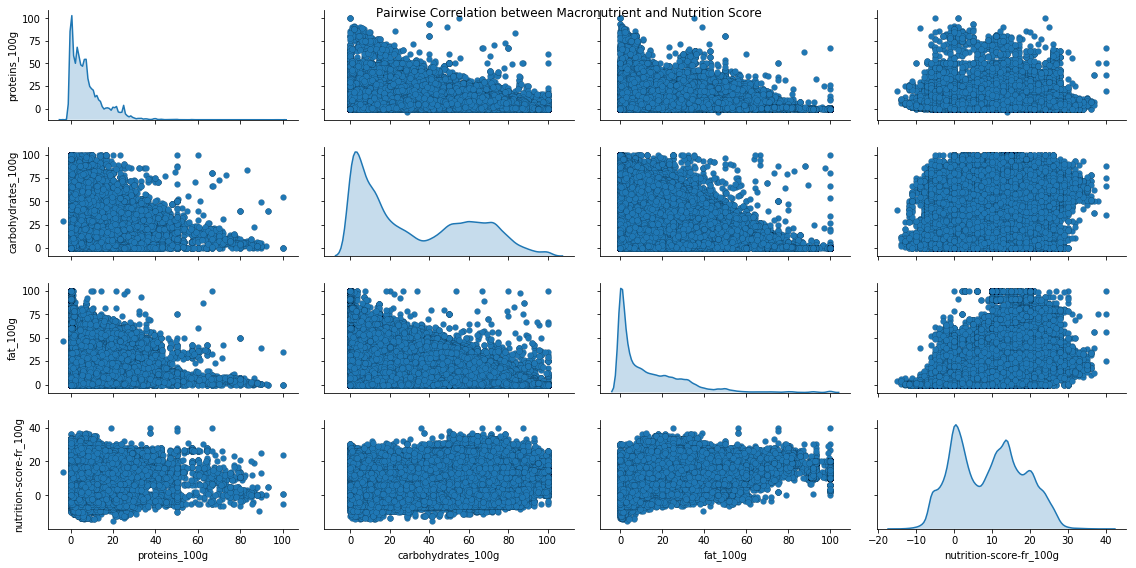

In [14]:
# Pair-wise Scatter Plots
cols = ['proteins_100g', 'carbohydrates_100g', 'fat_100g', 'nutrition-score-fr_100g']
macros_pair = food[cols].dropna(how='any')
macros_pair = macros_pair[(macros_pair['proteins_100g'] <= 100) & (macros_pair['carbohydrates_100g'] <= 100) & (macros_pair['fat_100g'] <= 100)]
pp = sns.pairplot(macros_pair, size=2, aspect=2,
                  plot_kws=dict(edgecolor="k", linewidth=0.1),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
t = fig.suptitle('Pairwise Correlation between Macronutrient and Nutrition Score')

Producing this chart, I, once again, learned that the real-world data isn't always clean. I had to drop records if one of values of 'proteins_100g', 'carbohydrates_100g', or 'fat_100g', is greater than 100. Of all 3 macronutrients, carbohydrate and fat are more corrlated to score, while protein is slightly less correlated than the other two nutrients.

Now, let's take a look at these nutrients used in the nutrition score calculation:
* _negative_ correlation: Energy, Saturated fat, Sugars, Sodium

    Note the strangeness in French nutrition score we're using that the lower the score, the better food grade/quality. Thus, when I say 'negative correlation', I practically mean in the sense of grade/quality, not the actual score. Thus, we seek to see a trend line formed between lower-left corner and upper-right corner in the graph, where these nutrients are on x-axis and nutrition score is on y-axis.


* _positive_ correlation: Fruits, vegetables and nuts, Fibers, Protein

    On the contrary, in positive correlation, we seek to find a trend line formed between upper-left corner and lower-right corner in the graph, where these nutrients are on x-axis and nutrition score is on y-axis.

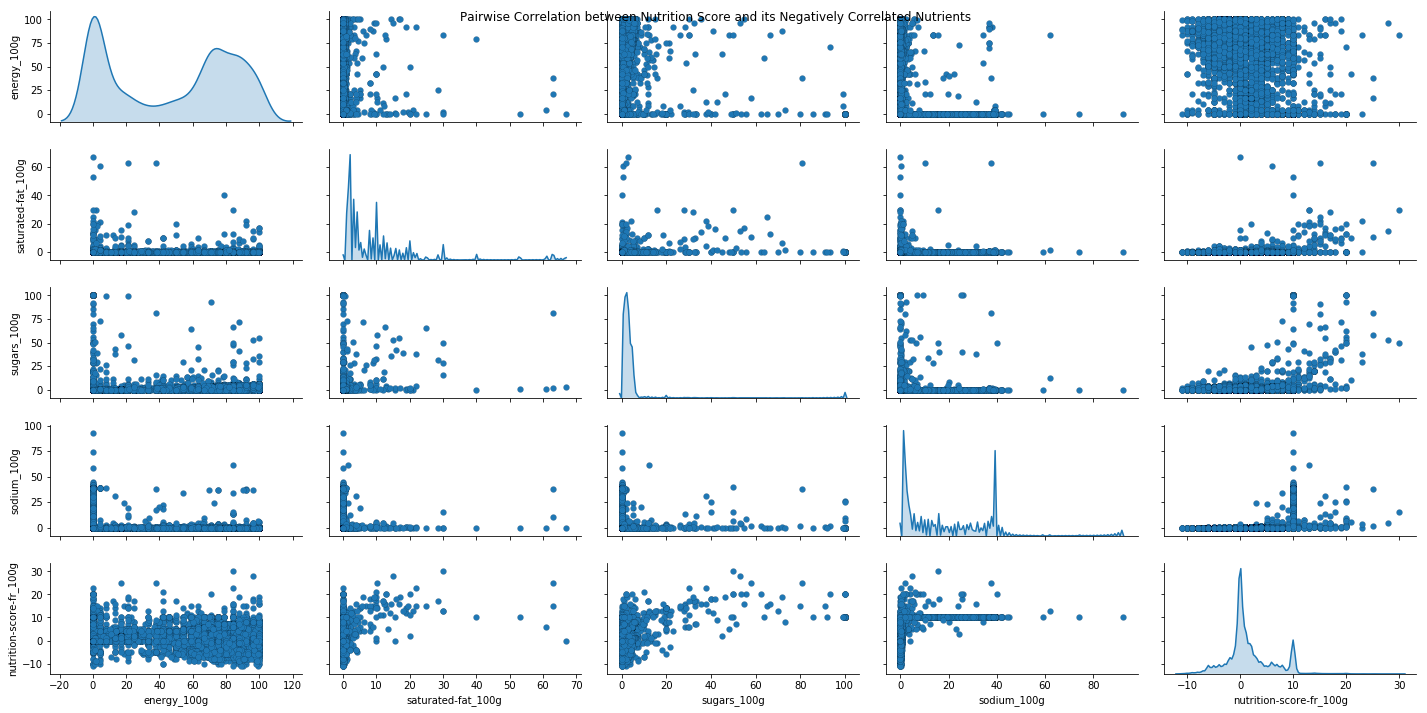

In [15]:
# Pair-wise Scatter Plots
cols = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'nutrition-score-fr_100g']
neg_corr_pair = food[cols].dropna(how='any')
neg_corr_pair = neg_corr_pair[(neg_corr_pair['energy_100g'] <= 100) & (neg_corr_pair['saturated-fat_100g'] <= 100) & (neg_corr_pair['sugars_100g'] <= 100) & (neg_corr_pair['sodium_100g'] <= 100)]
pp = sns.pairplot(neg_corr_pair, size=2, aspect=2,
                  plot_kws=dict(edgecolor="k", linewidth=0.1),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
t = fig.suptitle('Pairwise Correlation between Nutrition Score and its Negatively Correlated Nutrients')

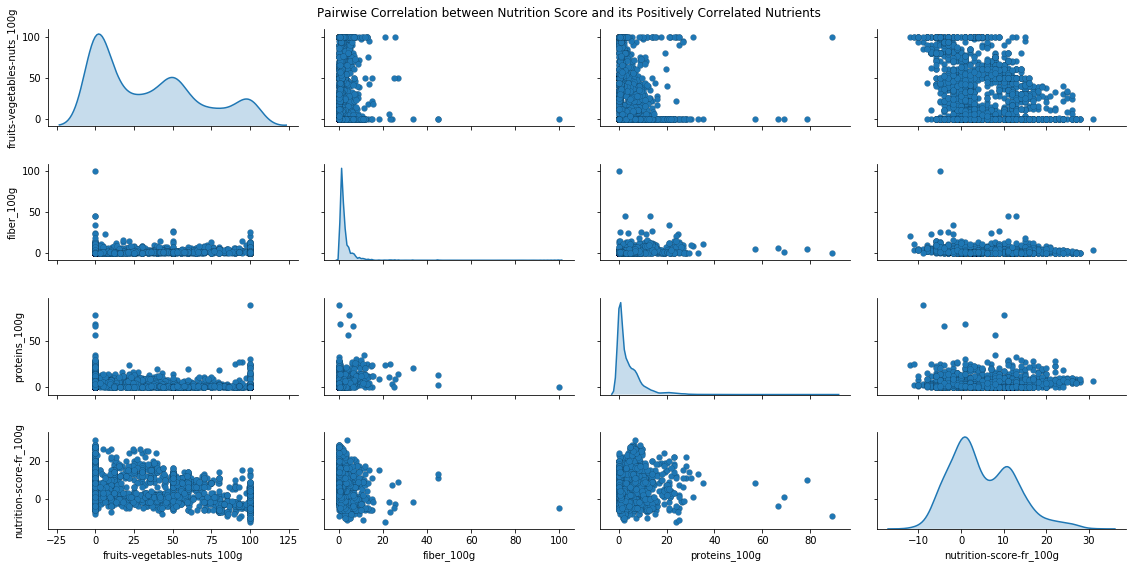

In [16]:
# Pair-wise Scatter Plots
cols = ['fruits-vegetables-nuts_100g', 'fiber_100g', 'proteins_100g', 'nutrition-score-fr_100g']
neg_corr_pair = food[cols].dropna(how='any')
neg_corr_pair = neg_corr_pair[(neg_corr_pair['fruits-vegetables-nuts_100g'] <= 100) & (neg_corr_pair['fiber_100g'] <= 100) & (neg_corr_pair['proteins_100g'] <= 100)]
pp = sns.pairplot(neg_corr_pair, size=2, aspect=2,
                  plot_kws=dict(edgecolor="k", linewidth=0.1),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
t = fig.suptitle('Pairwise Correlation between Nutrition Score and its Positively Correlated Nutrients')

In negative correlation can be ranked as follows: sugar, followed by saturated fat, sodium, and energy. In positive correlation, Fruits, vegetables and nuts shows the strongest correlation, followed by, perhaps, a tie between Fiber and Protein.

What does all this mean? Well, I'd conclude that the reason we didn't see clearer trend in both kinds of correction is because the nutrition score formula is pretty complex, involving several nutrients, but we're only doing a one-to-one analysis here.

In my opinion, the idea of doing exploratory analysis is to discover what we don't already know. So to find a correalation between two features, we should be adventurous and try them out even though we may think we have the domain knowledge such as food in this case. However, since this data set has about 100 numeric features of which to find corrlation between a pair, I'm going to create a few heatmaps to chunk those features, based on my knowledge injected, to refrain from grouping features that are very unlikely to be correlated.

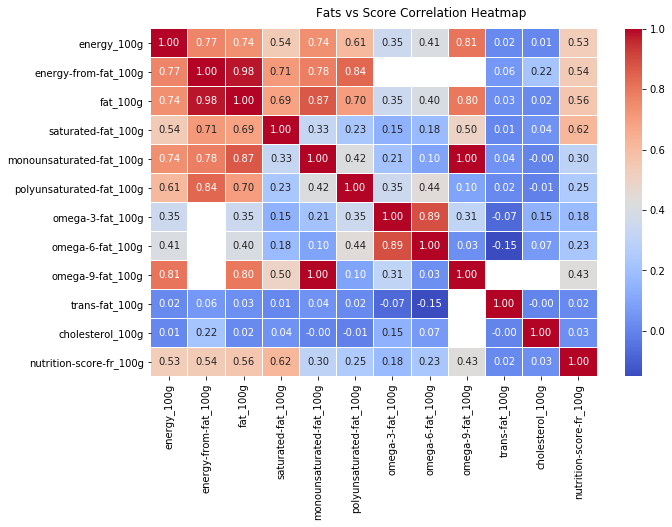

In [17]:
# Correlation Matrix Heatmap 1
col = ['energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'nutrition-score-fr_100g']
f, ax = plt.subplots(figsize=(10, 6))
corr = food[col].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Fats vs Score Correlation Heatmap', fontsize=12)

From the above heatmap, it's interesting to see that trans fat's and cholesterol's correlation to nutrition score are very low although I was expecting to see high negative values, representing the high correlation in inverse direction, i.e., the higher the amount of trans fat and cholesterol, the lower the score.

Looking at the row of 'fat_100g', monounsaturated fat has the highest correlation, followed by omega 9, polyunsaturated fat, and saturated fat. What this means to me is simply that, in this data set, there is a big number of food items that have high content of monounsaturated fat and low amount of other kinds of fat in them.

Omega 3 and omega 6 are highly correlated, which is intuitive that they're commonly found together. Omega 9 is perfectly correlated to monounsaturated fat simply because it's actually a kind of monounsaturated fat.

The biggest negative value is between omega 6 and trans fat. I'm not sure this means anything.

* **What's the distribution of food grades like?**

/Users/anirutw/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


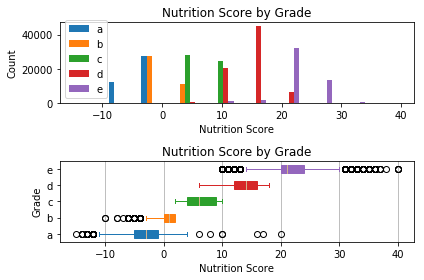

In [18]:
def plot_score_hist_by_grade(df):

    # prepare data to plot
    grades = sorted(list(df['nutrition_grade_fr'].dropna().unique()))
    lst_grade = [df[df['nutrition_grade_fr'] == grd]['nutrition-score-fr_100g'] for grd in grades]

    # create subplot layout
    fig, axes = plt.subplots(nrows=2, ncols=1)
    ax0, ax1 = axes.flatten()

    # 1 - histogram
    ax0.hist(lst_grade, 10, histtype='bar', label=grades)
    ax0.legend(prop={'size': 10})
    ax0.set_xlabel('Nutrition Score')
    ax0.set_ylabel('Count')
    ax0.set_title('Nutrition Score by Grade')

    # 2 - boxplot
    bp = ax1.boxplot(lst_grade, vert=False, patch_artist=True)
    ax1.xaxis.grid(True)
    ax1.set_xlabel('Nutrition Score')
    ax1.set_ylabel('Grade')
    ax1.set_title('Nutrition Score by Grade')
    plt.setp(ax1, yticklabels=grades)
    for elem_key, elem_val in bp.items():
        for idx, element in enumerate(elem_val):
            if elem_key == 'whiskers' or elem_key == 'caps':
                color = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx//2]
            else:
                color = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
            if elem_key == 'boxes':
                element.set(edgecolor=color)
                element.set(facecolor=color)
            elif elem_key == 'medians':
                element.set(color='tan')
            else:
                element.set(color=color)

    # show plots
    fig.tight_layout()
    plt.show()
plot_score_hist_by_grade(food)

* **What're the top N foods that are sold in most countries?**

To do this analysis, we need to create a new field to count number of countries for each food item.

In [19]:
food['countries_count'] = [len(cntry.split(",")) if pd.notna(cntry) else 0 for cntry in food['countries_en'].tolist()]
food['countries_count_rank'] = pd.Series(food['countries_count'].rank(ascending=False, method='dense'), dtype='int16')
food_top_10_by_countries_sold = food[food['countries_count_rank']<=7][['product_name','nutrition_grade_fr', 'countries_count', 'countries_count_rank']].sort_values(by=['countries_count'], ascending=False)
# print(food_top_10_by_countries_sold)

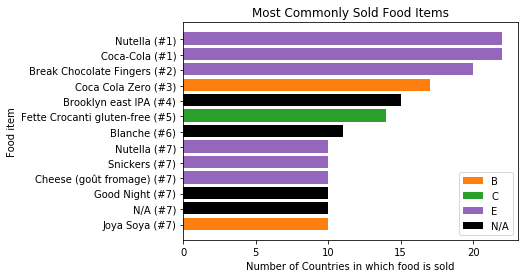

In [20]:
# prepare data to plot
ax_y = list(food_top_10_by_countries_sold['countries_count'])
# replace np.nan in product name with "N/A"
ax_x = ['N/A' + ' (#' + str(rank) + ')' if pd.isna(item)
        else item  + ' (#' + str(rank) + ')'
        for item, rank in zip(food_top_10_by_countries_sold['product_name'], 
                              food_top_10_by_countries_sold['countries_count_rank'])]
# print(ax_x)
ax_x_ticks = np.arange(len(ax_x), 0, -1)
bar_width = .7
color_grades = {}
# color bar by grade
for idx, element in enumerate(sorted(food['nutrition_grade_fr'].dropna().unique().tolist())):
    color_grades[element] = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
# set np.nan to black
color_grades[np.nan] = 'black'
color_top_foods = [color_grades[grd] for grd in food_top_10_by_countries_sold['nutrition_grade_fr']]

# create subplot layout
fig, ax = plt.subplots(nrows=1, ncols=1)
bar = ax.barh(ax_x_ticks, ax_y, align='edge', color=color_top_foods)#, label=label_top_foods)
ax.set_xlabel('Number of Countries in which food is sold')
ax.set_yticks(ax_x_ticks + bar_width / 2)
ax.set_yticklabels(ax_x)
ax.set_ylabel('Food item')
ax.set_title('Most Commonly Sold Food Items')
# legend
lgnd = {}
for idx, grd in enumerate(food_top_10_by_countries_sold['nutrition_grade_fr']):
    key = grd.upper() if pd.notna(grd) else 'N/A'
    if key not in lgnd:
        lgnd[key] = bar[idx]
ax.legend(tuple([lgnd[k] for k in sorted(lgnd.keys())]), tuple(sorted(lgnd.keys())), loc=4)

plt.show()

As you could see, we have clear winners, who tie: Nutella and Coco Cola, sold in 22 countries. Just because they're most commonly sold, it doesn't mean they're healthy -- unfortunately, their nutrition grade is E, the lowest in the dataset. Same argumet goes for the runner-up, Black Chocolate Fingers.

The 3rd place goes to the "zero-sugar" version of the winner and has a much better grade of B. Note that there are a few food items that do not have a grade, shown in black (and gave me a challenge when plotting the color on the bars), despite being common.

The 7th place is a big tie of several food items. Nutella shows up again -- it may just be that it's a different product altogether, but the name happens to be the same as the the 1st place one, or that the data isn't well consolidated. There's a food item, whose name is actually NA, which I rename to N/A.

* **What're the top N additives that are used in most items?**

To do this analysis, we need to create a new field to count number of food items found containing each food additive.

In [21]:
from collections import Counter
# create a flat list of additives
additive_list = []
for elem in food['additives_en'].dropna().tolist():
    additive_list += elem.split(",")
# additive_list = [tuple(elem.split(",")) for elem in food['additives_en'].dropna().tolist()]
additive_count = Counter(additive_list)
# sort dict by value in descending
additive_count = sorted(additive_count.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
additive_count_top_10 = list(zip(*additive_count[0:10]))
print(additive_count_top_10)

[('E330 - Citric acid', 'E322 - Lecithins', 'E322i - Lecithin', 'E101 - Riboflavin', 'E375 - Nicotinic acid', 'E101i - Riboflavin', 'E300 - Ascorbic acid', 'E415 - Xanthan gum', 'E412 - Guar gum', 'E500 - Sodium carbonates'), (49036, 29752, 26444, 22821, 22817, 22083, 17364, 16062, 12424, 11731)]


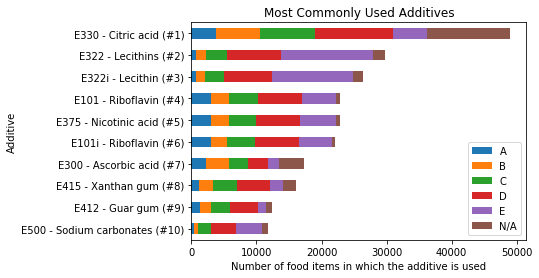

In [22]:
# create a new data frame for grade count
df_additive_grade_count = pd.DataFrame()
for idx, adtv in enumerate(additive_count_top_10[0]):
    df_tmp = food[pd.notna(food['additives_en']) & food['additives_en'].str.contains(adtv)].groupby('nutrition_grade_fr')[['code']].count().T
    df_tmp.index = pd.Index([adtv + " (#" + str(idx+1) + ")"])
    if df_additive_grade_count.size == 0:
        df_additive_grade_count = df_tmp.copy()
    else:
        df_additive_grade_count = pd.concat([df_additive_grade_count, df_tmp], axis=0)
df_additive_grade_count[pd.isna(df_additive_grade_count)] = 0
df_additive_grade_count['N/A'] = np.array(additive_count_top_10[1]) - df_additive_grade_count.sum(axis=1)
df_additive_plt = df_additive_grade_count.copy()
df_additive_plt.columns = [grd.upper() for grd in df_additive_plt.columns]
df_additive_plt = df_additive_plt.iloc[::-1]
ax = df_additive_plt.plot(kind='barh', stacked=True)
ax.set_xlabel('Number of food items in which the additive is used')
ax.set_ylabel('Additive')
ax.set_title('Most Commonly Used Additives')
plt.show()

As the chart above shows, most of food items that include those top mostly used 10 additives are not graded highly, primarily grades C-E. Although it's not fair to say that the additivies make the food bad, what the chart reveals alighs with the intuitive, common knowledge that foods should be consumed in their natural form.

* **What are the most protein, carbohydrate, fat, vitamin dense food items?**

Protein, carbohydrate, and fat are macronutrients and what make you look the way you do. In other words, the have the direct full impact on your body composition. Vitamins and minerals, a.k.a. micronutrients, on the contrary to the big 3 that they are have nothing to do with your body shape, they are vital to our well-being. So let's take a look and see what food items are packed with those nutrients.


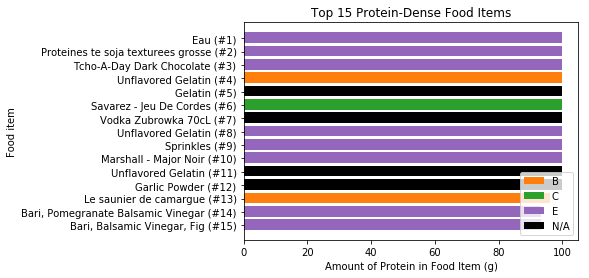

In [23]:
food_top_protein_dense = food[['product_name', 'proteins_100g', 'nutrition_grade_fr']].sort_values(by=['proteins_100g'], ascending=False)[0:20]
# remove food items with protein more than 100g
food_top_protein_dense = food_top_protein_dense[food_top_protein_dense['proteins_100g']<=100]
food_top_protein_dense['rank'] = range(1, food_top_protein_dense.shape[0]+1)
# print(food_top_protein_dense)

# prepare data to plot
ax_y = list(food_top_protein_dense['proteins_100g'])
# replace np.nan in product name with "N/A"
ax_x = ['N/A' + ' (#' + str(rank) + ')' if pd.isna(item)
        else item  + ' (#' + str(rank) + ')'
        for item, rank in zip(food_top_protein_dense['product_name'], 
                              food_top_protein_dense['rank'])]
# print(ax_x)
ax_x_ticks = np.arange(len(ax_x), 0, -1)
bar_width = .7
# color bar by grade
color_grades = {}
for idx, element in enumerate(sorted(food['nutrition_grade_fr'].dropna().unique().tolist())):
    color_grades[element] = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
# set np.nan to black
color_grades[np.nan] = 'black'
color_top_foods = [color_grades[grd] for grd in food_top_10_by_countries_sold['nutrition_grade_fr']]

# create subplot layout
fig, ax = plt.subplots(nrows=1, ncols=1)
bar = ax.barh(ax_x_ticks, ax_y, align='edge', color=color_top_foods)#, label=label_top_foods)
ax.set_xlabel('Amount of Protein in Food Item (g)')
ax.set_yticks(ax_x_ticks + bar_width / 2)
ax.set_yticklabels(ax_x)
ax.set_ylabel('Food item')
ax.set_title('Top ' + str(food_top_protein_dense.shape[0]) + ' Protein-Dense Food Items')

# legend
lgnd = {}
for idx, grd in enumerate(food_top_10_by_countries_sold['nutrition_grade_fr']):
    key = grd.upper() if pd.notna(grd) else 'N/A'
    if key not in lgnd:
        lgnd[key] = bar[idx]
ax.legend(tuple([lgnd[k] for k in sorted(lgnd.keys())]), tuple(sorted(lgnd.keys())), loc=4)

plt.show()

I found a few food items that have more than 100 grams of protein in 100 grams of food weight, which is impossible. Therefore, I added logic to drop those items. Yet, I'm still not sure data is really because I look at the chart and wonder how on earth food items such as #3 (Tcho dark chocolate), #7 (Vodka), or #12 (garlic powder) make this list.

In terms of food grade, it's also interesting to see most of these food items with grade 'E'. Instinctively, foods that are high in protein are rated highly. However, it quite makes sense when you look at the names of those E-grade food items because it's skeptical how they made the list.

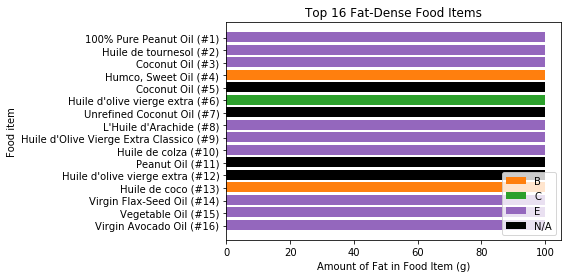

In [24]:
food_top_fat_dense = food[['product_name', 'fat_100g', 'nutrition_grade_fr']].sort_values(by=['fat_100g'], ascending=False)[0:20]
# remove food items with fat more than 100g
food_top_fat_dense = food_top_fat_dense[food_top_fat_dense['fat_100g']<=100]
food_top_fat_dense['rank'] = range(1, food_top_fat_dense.shape[0]+1)
# print(food_top_fat_dense)

# prepare data to plot
ax_y = list(food_top_fat_dense['fat_100g'])
# replace np.nan in product name with "N/A"
ax_x = ['N/A' + ' (#' + str(rank) + ')' if pd.isna(item)
        else item  + ' (#' + str(rank) + ')'
        for item, rank in zip(food_top_fat_dense['product_name'], 
                              food_top_fat_dense['rank'])]
# print(ax_x)
ax_x_ticks = np.arange(len(ax_x), 0, -1)
bar_width = .7
# color bar by grade
color_grades = {}
for idx, element in enumerate(sorted(food['nutrition_grade_fr'].dropna().unique().tolist())):
    color_grades[element] = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
# set np.nan to black
color_grades[np.nan] = 'black'
color_top_foods = [color_grades[grd] for grd in food_top_10_by_countries_sold['nutrition_grade_fr']]

# create subplot layout
fig, ax = plt.subplots(nrows=1, ncols=1)
bar = ax.barh(ax_x_ticks, ax_y, align='edge', color=color_top_foods)#, label=label_top_foods)
ax.set_xlabel('Amount of Fat in Food Item (g)')
ax.set_yticks(ax_x_ticks + bar_width / 2)
ax.set_yticklabels(ax_x)
ax.set_ylabel('Food item')
ax.set_title('Top ' + str(food_top_fat_dense.shape[0]) + ' Fat-Dense Food Items')

# legend
lgnd = {}
for idx, grd in enumerate(food_top_10_by_countries_sold['nutrition_grade_fr']):
    key = grd.upper() if pd.notna(grd) else 'N/A'
    if key not in lgnd:
        lgnd[key] = bar[idx]
ax.legend(tuple([lgnd[k] for k in sorted(lgnd.keys())]), tuple(sorted(lgnd.keys())), loc=4)

plt.show()

Similar data cleanliness story in fat -- there are some food items that have more than 100 grams of fat in 100 grams of its weight. Unsurprisingly, all the food items that make this list are oils.

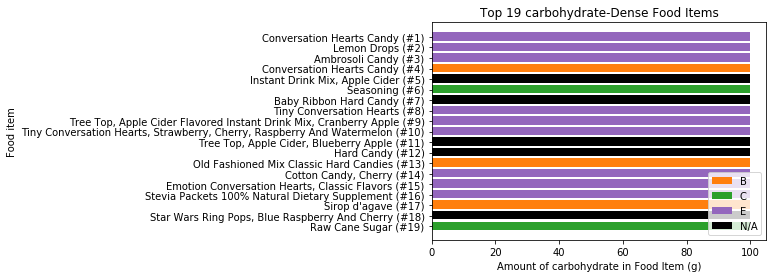

In [25]:
food_top_carbohydrate_dense = food[['product_name', 'carbohydrates_100g', 'nutrition_grade_fr']].sort_values(by=['carbohydrates_100g'], ascending=False)[0:40]
# remove food items with carbohydrate more than 100g

food_top_carbohydrate_dense = food_top_carbohydrate_dense[food_top_carbohydrate_dense['carbohydrates_100g']<=100]
food_top_carbohydrate_dense['rank'] = range(1, food_top_carbohydrate_dense.shape[0]+1)
# print(food_top_carbohydrate_dense)

# prepare data to plot
ax_y = list(food_top_carbohydrate_dense['carbohydrates_100g'])
# replace np.nan in product name with "N/A"
ax_x = ['N/A' + ' (#' + str(rank) + ')' if pd.isna(item)
        else item  + ' (#' + str(rank) + ')'
        for item, rank in zip(food_top_carbohydrate_dense['product_name'], 
                              food_top_carbohydrate_dense['rank'])]
# print(ax_x)
ax_x_ticks = np.arange(len(ax_x), 0, -1)
bar_width = .7
# color bar by grade
color_grades = {}
for idx, element in enumerate(sorted(food['nutrition_grade_fr'].dropna().unique().tolist())):
    color_grades[element] = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
# set np.nan to black
color_grades[np.nan] = 'black'
color_top_foods = [color_grades[grd] for grd in food_top_10_by_countries_sold['nutrition_grade_fr']]

# create subplot layout
fig, ax = plt.subplots(nrows=1, ncols=1)
bar = ax.barh(ax_x_ticks, ax_y, align='edge', color=color_top_foods)#, label=label_top_foods)
ax.set_xlabel('Amount of carbohydrate in Food Item (g)')
ax.set_yticks(ax_x_ticks + bar_width / 2)
ax.set_yticklabels(ax_x)
ax.set_ylabel('Food item')
ax.set_title('Top ' + str(food_top_carbohydrate_dense.shape[0]) + ' carbohydrate-Dense Food Items')

# legend
lgnd = {}
for idx, grd in enumerate(food_top_10_by_countries_sold['nutrition_grade_fr']):
    key = grd.upper() if pd.notna(grd) else 'N/A'
    if key not in lgnd:
        lgnd[key] = bar[idx]
ax.legend(tuple([lgnd[k] for k in sorted(lgnd.keys())]), tuple(sorted(lgnd.keys())), loc=4)

plt.show()

The data-cleanliness story repeats for carbohydrate and is even worse. I found up to 21 food items that have more than 100 grams of carbs in 100 grams of the food weight. It makes sense that most of these items, which are sugar-based, make the list. In terms of food grade, it's interesting to see some of them are graded B, which is not pretty good, considering they contain 100 grams of carbs in 100 grams of their weight.

## In-Depth Data Analysis



In [26]:
food['main_category_en'].dropna().unique().tolist()

['fr:Filet-de-boeuf',
 'Plant-based foods and beverages',
 'Sugary snacks',
 'fr:Boulange',
 'Beverages',
 'Meals',
 'Meats',
 'Syrups',
 'Chicken-feet',
 'Desserts',
 'Groceries',
 'Dietary supplements',
 'Chips and fries',
 'Fish and meat and eggs',
 'fr:Pate-au-foie-de-canard',
 'Terrine',
 'Dairies',
 'Spreads',
 'Breakfasts',
 'Carrot-coriander-soup',
 'Scottish-shortbread',
 'Charcuteries',
 'Salty snacks',
 'Tuna-steaks',
 'Sandwiches',
 'Pear-and-blackcurrant-juice',
 'Crêpes and galettes',
 'Harengs',
 'it:Vinaigre-balsamique',
 'Fats',
 'Parve',
 'Pickles',
 'Lindt-sea-salt-chocolate',
 'Pates-a-tartiner-aux-noisettes-et-au-cacao',
 'Fresh foods',
 'Salad',
 'Fruit juices',
 'Hoisin-sauce',
 'Pumpkin-seed-pecan',
 'Rice-candy',
 'Frozen foods',
 'Pies',
 'fr:Sauce-aux-piments',
 'Vanilla-soymilk',
 'Diet-colas',
 'Tea-drinks',
 'Sweeteners',
 'Caramel-popcorn',
 'Semolina',
 'Eau-de-vie',
 'Baked-beans',
 'Seafood',
 'Barbeque-sauce',
 'Cinnamon-raisin-bagels',
 'Snacks',
 'H

* **What is the food trend being manufactured and sold over the years?**

(to be completed)

Will we see that an upward trend for healthy foods to be manufactured and sold across the globe, (or only in certain countries)?

## Prediction with Machine Learning

In this section, we'll use Machine Learning on this data set in the following ways:

* As a *Supervised Learning* problem

    * Classification: predict food grade from other features, using provided grade as label
    * Regression: predict food score from other features, using provided score as label. Ultimately, I'd like this model to be a simpler than the model used in the data set. This probably means we would go with Decision Tree or Linear Regression from which we can learn the importance of each nutrient, whereas Neural Network would be ruled out as its model is not as easily interpretable. 


* As an *Unsupervised Learning* problem
    * Clustering: group food items of the same grade, without using grade field


* As a *Generative* model
    * create (healthy) food recipes -- need a separate food recipe data set to learn from

* As a *Supervised Learning* problem

    First off, let's give Decision Trees a shot to see how well it works against this data set.

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

# split data into train & test sets
# ensure we have enough representation of each quarter
sss = StratifiedShuffleSplit(n_splits=10,
                             test_size=0.3,
                             train_size=0.7,
                             random_state=0)

In [28]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# features_DT = ['main_category_en', 'sugars_100g', 'sodium_100g', 'saturated-fat_100g', 'fruits-vegetables-nuts_100g', 'fiber_100g', 'proteins_100g']
features_DT = ['sugars_100g', 'sodium_100g', 'saturated-fat_100g', 'fruits-vegetables-nuts_100g', 'fiber_100g', 'proteins_100g']
response = ['nutrition_grade_fr']

# remove incorrect items with amount of those features greater than 100g
food_clstr = food[features_DT + response].dropna(how='any')
food_clstr = food_clstr[  (food_clstr['proteins_100g']<=100)
                        & (food_clstr['proteins_100g']>=0)
                        & (food_clstr['saturated-fat_100g']<=100)]

X = food_clstr[features_DT]
y = food_clstr[response].values
labels = list(np.unique(y))

DT = DecisionTreeClassifier()
accuracy = []; precision = []; recall = [];

for idx_train, idx_test in sss.split(X, y):
    
    # split train & test data
    X_train, y_train = X.iloc[idx_train], y[idx_train]
    X_test, y_test = X.iloc[idx_test], y[idx_test]
    
    # DT - fit and predict
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    # calculate and store accuracy, precision, recall per split
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    precision.append(metrics.precision_score(y_test, y_pred, labels=labels, average='macro'))
    recall.append(metrics.recall_score(y_test, y_pred, labels=labels, average='macro'))

# accuracy
accuracy = np.array(accuracy)
print("Accuracy: \t{:.2f}%".format(np.sqrt(accuracy).mean()*100))
# precision
precision = np.array(precision)
print("Precision: \t{:.2f}%".format(np.sqrt(precision).mean()*100))
# recall
recall = np.array(recall)
print("Recall: \t{:.2f}%".format(np.sqrt(recall).mean()*100))

Accuracy: 	86.07%
Precision: 	86.54%
Recall: 	86.12%


In [63]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y1hot = label_binarize(y, classes=labels)

OVR = OneVsRestClassifier(DT)
y_test_all = np.zeros((len(labels)));
y_pred_all = np.zeros((len(labels)));

for idx_train, idx_test in sss.split(X, y1hot):
    
    # split train & test data
    X_train, y_train = X.iloc[idx_train], y1hot[idx_train]
    X_test, y_test = X.iloc[idx_test], y1hot[idx_test]

    # OVR - fit and predict
    OVR.fit(X_train, y_train)
    y_pred = OVR.predict_proba(X_test)

    # store y_pred and y_test to perform ROC AUC at the end of cross validation
    if y_test_all is None:
        y_test_all = y_test.copy()
    else:
        y_test_all = np.vstack((y_test_all, y_test))
    if y_pred_all is None:
        y_pred_all = y_pred.copy()
    else:
        y_pred_all = np.vstack((y_pred_all, y_pred))

603 603
1205 1205
1807 1807
2409 2409
3011 3011
3613 3613
4215 4215
4817 4817
5419 5419
6021 6021


In [80]:
# calculate TPR, FPR, and ROC-AUC
fpr = dict() # np.zeros((len(labels)))
tpr = dict() # np.zeros((len(labels)))
roc_auc = dict() # np.zeros((len(labels)))

for i in range(len(labels)):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_all[:, i], y_pred_all[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

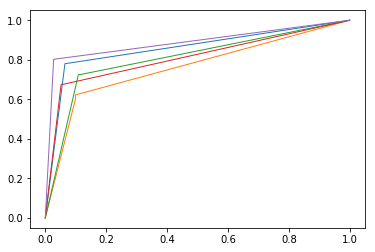

In [81]:
# # color bar by grade
# for idx, element in enumerate(sorted(food['nutrition_grade_fr'].dropna().unique().tolist())):
#     color_grades[element] = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
# # set np.nan to black
# color_grades[np.nan] = 'black'
# color_top_foods = [color_grades[grd] for grd in food_top_10_by_countries_sold['nutrition_grade_fr']]

# colors = cycle(['blue', 'red', 'green'])
for i, grade in enumerate(list(color_grades.keys())):
    if grade is np.nan:
        continue
    plt.plot(fpr[i], tpr[i], color=color_grades[grade], lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

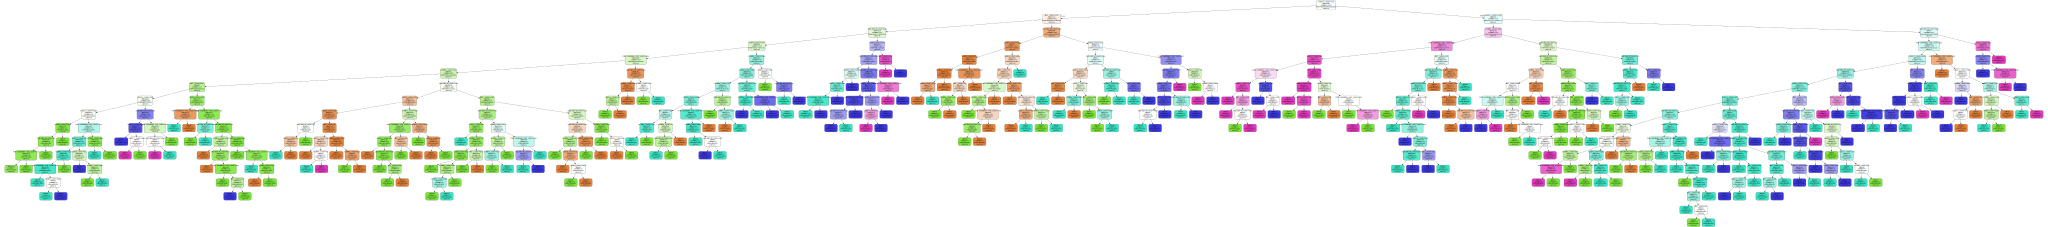

In [82]:
import graphviz
DT_graph = skl.tree.export_graphviz(DT, 
                                    out_file=None,
                                    feature_names=features_DT,
                                    class_names=labels,
                                    filled=True,
                                    rounded=True)
graph = graphviz.Source(DT_graph)
graph
# graph.render("Decision Tree")

* As an *Unsupervised Learning* problem

    When it comes to grading food, in my opinion, I'll first look at macronutrients. So, firstly, let's create a 3D scatter plot by food grade using amounts of protein, carbohydrate, and fat as axes.

In [83]:
# select features for clustering
features = ['proteins_100g', 'fat_100g', 'carbohydrates_100g']
# remove incorrect items with amount of those features greater than 100g
food_clstr = food[features + ['nutrition_grade_fr']].dropna(how='any')
food_clstr = food_clstr[    (food_clstr['proteins_100g']<=100)
                          & (food_clstr['proteins_100g']>=0)
                          & (food_clstr['fat_100g']<=100) 
                          & (food_clstr['carbohydrates_100g']<=100)]

food_clstr_grade = food_clstr['nutrition_grade_fr'].copy()
food_clstr_grade[food_clstr_grade == 'a'] = 1
food_clstr_grade[food_clstr_grade == 'b'] = 2
food_clstr_grade[food_clstr_grade == 'c'] = 3
food_clstr_grade[food_clstr_grade == 'd'] = 4
food_clstr_grade[food_clstr_grade == 'e'] = 5
# print(food_clstr_grade.unique())

Text(0.5,0,'Carb')

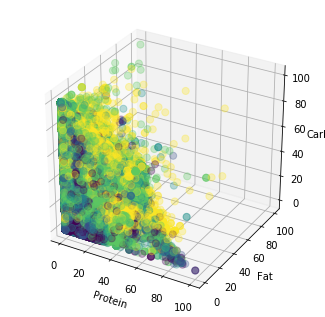

In [84]:
# plot 3D
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure(figsize=(12, 12))
ax2 = fig2.add_subplot(222, projection='3d')
xs = food_clstr['proteins_100g']
ys = food_clstr['fat_100g']
zs = food_clstr['carbohydrates_100g']
ax2.scatter(xs, ys, zs, c=food_clstr_grade, s=50, alpha=0.3) #, edgecolors='w')
ax2.set_xlabel('Protein')
ax2.set_ylabel('Fat')
ax2.set_zlabel('Carb')

    You can see that the clusters by grade are not clearly formed. In other words, grades are not directly correlated with macronutrients. This is because there are products like oils, all of which are purely fats, that can be have multiple grades. However, it doesn't hurt to still give macronutrients a chance by doing KMeans clustering for fun.

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(food_clstr[features])
y_kmeans = kmeans.predict(food_clstr[features])

Text(0.5,0,'Carb')

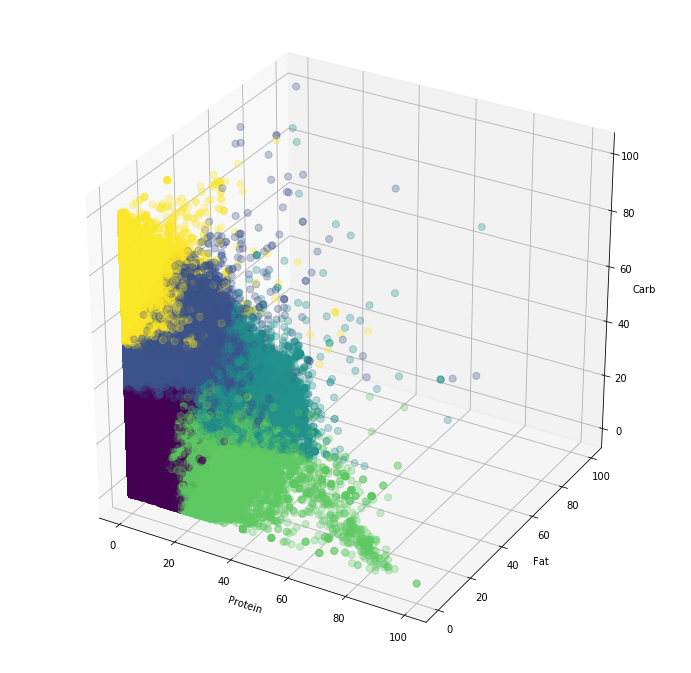

In [86]:
# plot 3D
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(xs, ys, zs, c=y_kmeans, s=50, alpha=0.3) #, edgecolors='w')
ax1.set_xlabel('Protein')
ax1.set_ylabel('Fat')
ax1.set_zlabel('Carb')
# centers = kmeans.cluster_centers_
# ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.8)

    As you can see, KMeans clustering did a good job grouping food items into 5 clusters even though these clusters do not match ground truth at all.

In [87]:
# features.remove('fat_100g')
kmeans = KMeans(n_clusters=5)
kmeans.fit(food_clstr[features])
y_kmeans = kmeans.predict(food_clstr[features])

Text(0,0.5,'Fat')

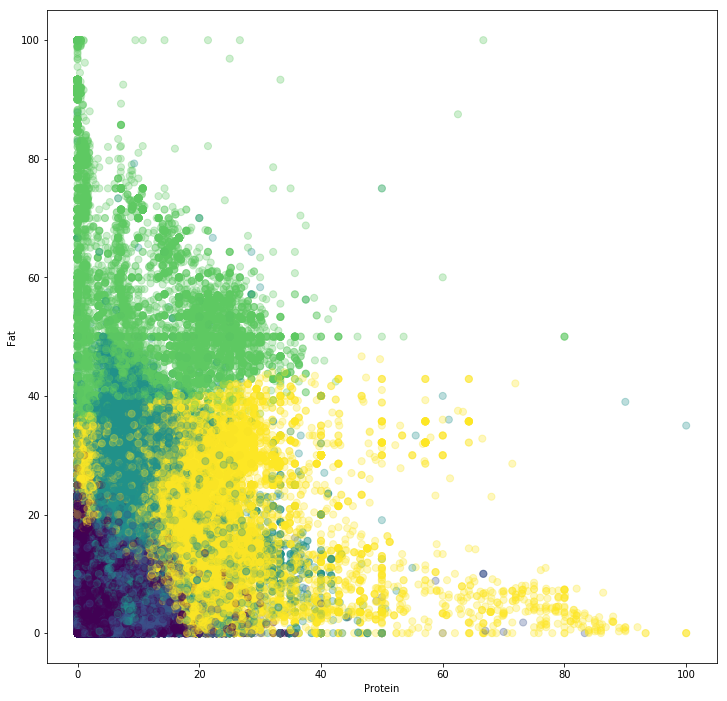

In [88]:
# plot 3D
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111)
ax1.scatter(xs, ys, c=y_kmeans, s=50, alpha=0.3) #, edgecolors='w')
ax1.set_xlabel('Protein')
ax1.set_ylabel('Fat')
# ax1.set_zlabel('Carb')
# centers = kmeans.cluster_centers_
# ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.8)

## Summary

(to be completed)